K-Means Clustering

Рассмотрим метод для определения оптиального числа кластеров - метод к-средних. Импортируем библиотеки, данные и модули.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('vehicleprice_prep3.csv')

Выведем данные на экран чтобы убедиться в правильности отображения. Имеем 8 колонок и 1940 строк.

In [3]:
df

,brand,year,body,car_mileage,fuel,power,transmission,price
0,ford,2006,other,220,diesel,2.0,manual,0
1,renault,2017,other,211,diesel,2.3,manual,1
2,opel,2015,other,157,diesel,1.6,manual,1
3,ford,2000,other,300,diesel,2.4,manual,0
4,volkswagen,2002,other,270,diesel,2.5,manual,0
...,...,...,...,...,...,...,...,...
1935,renault,2005,liftback,311,diesel,1.9,manual,0
1936,skoda,2009,liftback,201,diesel,2.0,manual,0
1937,audi,2012,liftback,199,petrol,1.8,automatic,1
1938,skoda,2008,liftback,226,gas,1.6,manual,0


В нашем датасете присутствуют качественные переменные. Их необходимо закодировать с помощью функции.
Запишем список нечисловых переменных и проведем кодирование качественных переменных. Результат запишем обратно в базу.

In [4]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [5]:
# Encoding categorical data
df = encoding_char(df)

Посмотрим, как будут выглядеть наши закодированные данные. Теперь все переменные в ней являются числовыми. 
С ними можно теперь работать.

In [6]:
df

,brand,year,body,car_mileage,fuel,power,transmission,price
0,0,2006,0,220,0,2.0,0,0
1,1,2017,0,211,0,2.3,0,1
2,2,2015,0,157,0,1.6,0,1
3,0,2000,0,300,0,2.4,0,0
4,3,2002,0,270,0,2.5,0,0
...,...,...,...,...,...,...,...,...
1935,1,2005,10,311,0,1.9,0,0
1936,10,2009,10,201,0,2.0,0,0
1937,12,2012,10,199,1,1.8,1,1
1938,10,2008,10,226,2,1.6,0,0


Осуществлять работу с выбросами мы не будем, т.к.в дальнейшем они могут оказаться значимыми.

Отшкалируем данные, используя MinMaxScaler, переведя наши данные в диапазон от 0 до 1 с округлением.  Используем мин-макс шкалирование т.к. он не внесет никаких дополнительных изменений. Вывыдем результат в таблицу, подписав соответственно названия столбцов.

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['brand','year','body','car_mileage','fuel','power','transmission','price']).round()

,brand,year,body,car_mileage,fuel,power,transmission,price
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1935,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1936,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1937,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1938,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


Посмотрим  на метод локтя для алгоритмя к-средних. Это нужно для того, чтобы видеть, сколько кластеров имеет смысл выделить. Прогоним наш алгоритм в цикле от 1 до 11 кластеров.  Посмотрим как будет изменяться функция расстояния от ядра до объектов кластера и отобразим на графике.

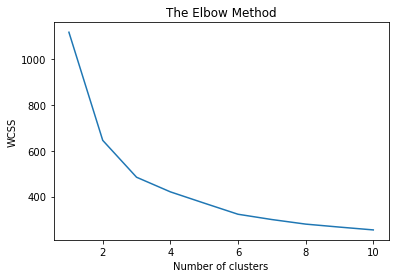

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Видим, что функция падает при 2х и 3х кластерах, потом на 4м скорость плавно падает. Также можно выделить перелом на 6ти кластерах

Еще один метод для определения оптиального числа кластеров - метод силуэта. Применим для рассчета кластеров от 2х до 7ми. 

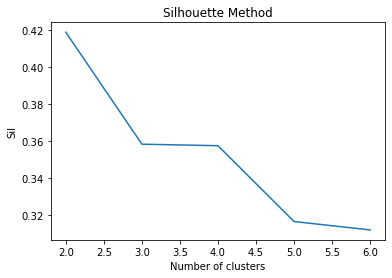

2:0.41885316125542865
3:0.35827642520530306
4:0.35745061336993766
5:0.3164180727846473
6:0.31188593471665793


In [9]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 7):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 7), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Видим, что максимкальное значение у нас достигается при 2х кластерах, т.к. его значение наибольшее. Далее идет 3 кластера. Но можно попытаться выделить 4 кластера на наших данных. Применим метод к-средних с 4мя кластерами и выведем ядра в табличку. 

In [10]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['brand','year','body','car_mileage','fuel','power','transmission','price'])

,brand,year,body,car_mileage,fuel,power,transmission,price
0,0.196154,0.692122,0.418307,0.334680,-5.551115e-17,0.226316,0.093822,-3.885781e-16
1,0.209656,0.648217,0.146277,0.279587,7.321168e-01,0.234136,0.152920,1.110223e-15
2,0.271179,0.853635,0.388853,0.158997,3.747981e-01,0.391438,0.278271,1.000000e+00
3,0.235299,0.689160,0.816080,0.230268,6.030151e-01,0.188526,0.110553,-2.775558e-16


Сократим количество переменных до 6и, удалив показатель body.  Попробуем увеличить число кластеров до 6ти как в предыдущей можели. Обучим на множестве и выведем ядра.

In [12]:
# Less features
X = df[:, [0,1,3,4,5,6,7]]

In [14]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 6, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['brand','year','car_mileage','fuel','power','transmission','price']).round(2)

,brand,year,car_mileage,fuel,power,transmission,price
0,0.47,0.79,0.17,0.64,0.70,0.30,1.0
1,0.20,0.69,0.33,0.00,0.23,0.09,-0.0
2,0.21,0.70,0.23,0.50,0.22,0.15,0.0
3,0.22,0.60,0.33,1.00,0.24,0.13,0.0
4,0.21,0.88,0.12,0.55,0.32,0.29,1.0
5,0.25,0.85,0.21,-0.00,0.33,0.25,1.0


 Можем видеть, что: 
 *при более позднем годе выпуска, меньшему пробегу, большей мощности с трансмиссией типа "типтроник" отнесловь к кластеру с ценой выше средней;
 *при позднем годе выпуска, большему пробегу, меньшей мощности с трансмиссией типа "ручная" отнеслось к кластеру с ценой ниже средней;
 *при более позднем годе выпуска, среднему пробегу, меньшей мощности с топливом "бензин" с трансмиссией типа "автомат" отнесловь к кластеру с ценой ниже средней;
 *при более позднем годе выпуска, меньшему пробегу, меньшей мощности с топливом "газ" с трансмиссией типа "механика" отнесловь к ксластеру с ценой ниже средней;
  *при более позднем годе выпуска, меньшему пробегу, меньшей мощности с топливом "бензин" с трансмиссией типа "типтроник" отнесловь к ксластеру с ценой выше средней;
   *при более позднем годе выпуска, среднему пробегу, меньшей мощности с топливом "дизель" с трансмиссией типа "типтроник" отнесловь к ксластеру с ценой выше средней;
   
 Мы получили некую базу для дальнейшего построения нейронной сети в задачах кластеризации. Сравним полученные данные с предыдущим результатом на основе Hierarchical Clustering

In [15]:
# Importing hc clusters
import pickle
input = open('vehicleprice_prepar.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

Как видим, результат пересекается больше чем на 72,9% поэтому будем считать, что мы на правильном пути.

In [16]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.7296610927963496

Импортируем данные в новую выборку.

In [17]:
# Export km clusters
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()# Export km clusters
import pickle
obj = {'km': km}
output = open('vehicleprice_prep2-km.pkl', 'wb')
pickle.dump(obj, output, 5)
output.close()